### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

### Use the prompts below to get started with your data analysis.  

### 1. Read in the `coupons.csv` file.




In [2]:
data = pd.read_csv('data/coupons.csv')

In [3]:
data.head(10)

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
5,No Urgent Place,Friend(s),Sunny,80,6PM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
6,No Urgent Place,Friend(s),Sunny,55,2PM,Carry out & Take away,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
7,No Urgent Place,Kid(s),Sunny,80,10AM,Restaurant(<20),2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
8,No Urgent Place,Kid(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


## 2. Investigate the dataset for missing or problematic data.

### We can first check which column has NaN values

In [4]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

## There are 3 issues we observed with the data set
a. The "car" columns has a high number of NaN values

b. The "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20". and "Restaurant20to50" columns have small number of NaN values

c. "toCoupon_GEQ5min", "toCoupon_GEQ15min", and "toCoupon_GEQ25min" contains redundent information, and should be combined to 1 column

### a. The "car" column

In [5]:
data['car'].value_counts()

Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: car, dtype: int64

### There is only a small set of valid data, we can just drop this column

In [6]:
data = data.drop('car', axis=1)

In [7]:
data.isnull().sum()

destination               0
passanger                 0
weather                   0
temperature               0
time                      0
coupon                    0
expiration                0
gender                    0
age                       0
maritalStatus             0
has_children              0
education                 0
occupation                0
income                    0
Bar                     107
CoffeeHouse             217
CarryAway               151
RestaurantLessThan20    130
Restaurant20To50        189
toCoupon_GEQ5min          0
toCoupon_GEQ15min         0
toCoupon_GEQ25min         0
direction_same            0
direction_opp             0
Y                         0
dtype: int64

### b. The "Bar", "CoffeeHouse", "CarryAway", "RestaurantLessThan20". and "Restaurant20To50" column
#### Since these numbers are relatively small when compare to data set, we can replace NaN with "never"

In [8]:
data['Bar'] = data['Bar'].fillna("never")
data['CoffeeHouse']=data["CoffeeHouse"].fillna("never")
data['CarryAway']=data['CarryAway'].fillna("never")
data['RestaurantLessThan20']=data['RestaurantLessThan20'].fillna("never")
data['Restaurant20To50']=data['Restaurant20To50'].fillna("never")

In [9]:
data.isnull().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

### c. Column "toCoupon_GEQ5min", "toCoupon_GEQ15min", and "toCoupon_GEQ25min"

In [10]:
data['CouponETA'] = data["toCoupon_GEQ5min"]+data["toCoupon_GEQ15min"]+data["toCoupon_GEQ25min"]

In [11]:
data['CouponETA'].value_counts()

2    5611
1    5562
3    1511
Name: CouponETA, dtype: int64

1 means between 5 to 15 min, 2 means between 15 and 25 min, and 3 means greater than 25 min, we should change them to the appropreate names

In [12]:
data['CouponETA'] = data['CouponETA'].astype(str)
data['CouponETA'] = data['CouponETA'].str.replace("1","5to15min")
data['CouponETA'] = data['CouponETA'].str.replace("2","15to25min")
data['CouponETA'] = data['CouponETA'].str.replace("3","gr25min")

In [13]:
data['CouponETA'].value_counts()

15to25min    5611
5to15min     5562
gr25min      1511
Name: CouponETA, dtype: int64

## 3. What proportion of the total observations chose to accept the coupon? 



In [14]:
num_entries = data.shape[0]
num_yes = data['Y'].sum()
proportion_accepted = num_yes/num_entries
proportion_accepted

0.5684326710816777

## 4. Use a bar plot to visualize the `coupon` column.

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Restaurant(<20)'),
  Text(1, 0, 'Coffee House'),
  Text(2, 0, 'Carry out & Take away'),
  Text(3, 0, 'Bar'),
  Text(4, 0, 'Restaurant(20-50)')])

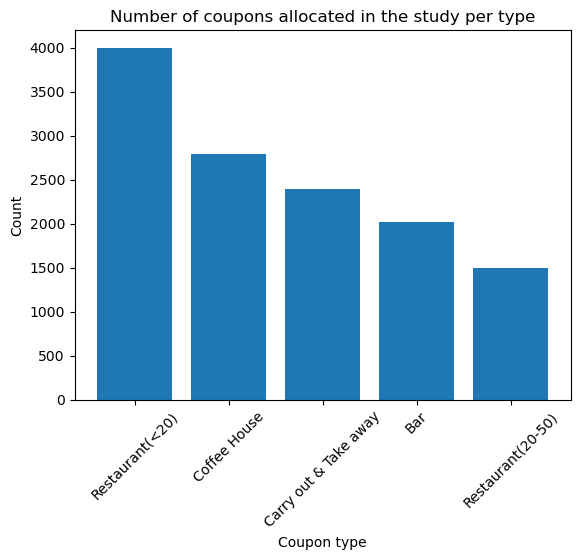

In [15]:
plt.bar(data['coupon'].unique(),data['coupon'].value_counts())
plt.xlabel("Coupon type", )
plt.ylabel("Count")
plt.title("Number of coupons allocated in the study per type")
plt.xticks(rotation = 45)


### To display the number of accepted and rejected couper per type

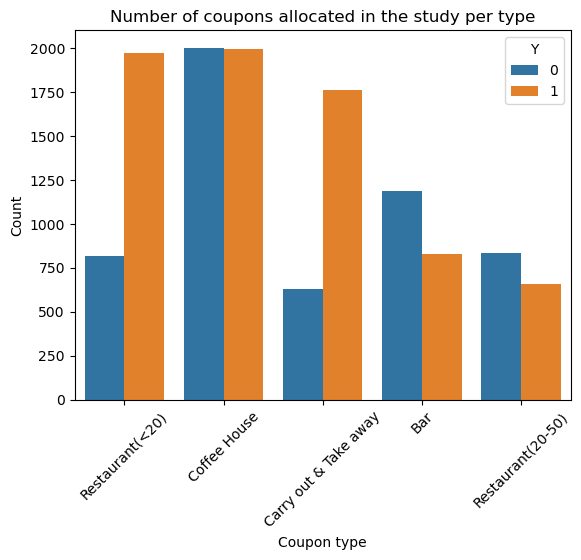

In [16]:
fig = sns.countplot(x="coupon", data=data, hue="Y")
plt.xlabel("Coupon type")
plt.ylabel("Count")
plt.title("Number of coupons allocated in the study per type")
plt.xticks(rotation = 45)
plt.show(fig)

## 5. Use a histogram to visualize the temperature column.

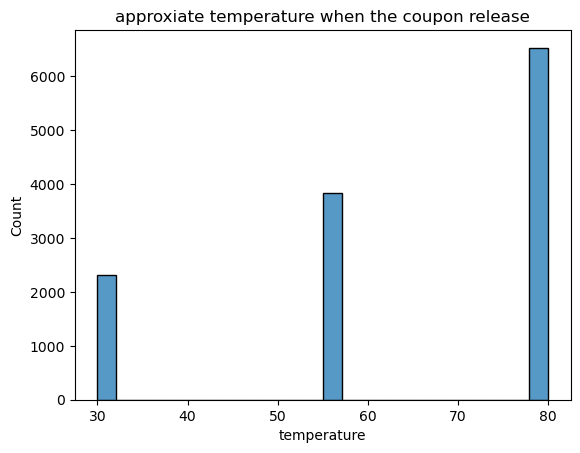

In [17]:
sns.histplot(data=data, x="temperature")
plt.xlabel("temperature")
plt.ylabel("Count")
plt.title("approxiate temperature when the coupon release")
plt.show(fig)

## **Investigating the Bar Coupons**

### Now, we will lead you through an exploration of just the bar related coupons.  

### 1. Create a new `DataFrame` that contains just the bar coupons.


In [18]:
bar_data = data[data['coupon']=="Bar"]
bar_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,CouponETA
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,1~3,1,1,0,0,1,0,15to25min
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,1~3,1,0,0,1,0,1,5to15min
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,4~8,1~3,1,1,1,0,1,0,gr25min
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,0,1,1,5to15min
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,4~8,4~8,less1,1,0,0,1,0,1,5to15min


### 2. What proportion of bar coupons were accepted?


In [19]:
num_no = bar_data['Y'].value_counts()[0]
num_yes = bar_data['Y'].value_counts()[1]
proportion = num_yes / (num_no + num_yes)
print(f'The proportion of accepted bar coupon is {proportion}')

The proportion of accepted bar coupon is 0.41001487357461575


### 3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [20]:
data.columns.values.tolist()

['destination',
 'passanger',
 'weather',
 'temperature',
 'time',
 'coupon',
 'expiration',
 'gender',
 'age',
 'maritalStatus',
 'has_children',
 'education',
 'occupation',
 'income',
 'Bar',
 'CoffeeHouse',
 'CarryAway',
 'RestaurantLessThan20',
 'Restaurant20To50',
 'toCoupon_GEQ5min',
 'toCoupon_GEQ15min',
 'toCoupon_GEQ25min',
 'direction_same',
 'direction_opp',
 'Y',
 'CouponETA']

In [21]:
bar_data['Bar'].value_counts()

never    851
less1    570
1~3      397
4~8      150
gt8       49
Name: Bar, dtype: int64

In [22]:
# Get the statistic for people who vist the bar more or less than 3 time
three_or_less_stat = bar_data[bar_data['Bar'].isin(['never', 'less1', '1~3'])]['Y']
four_or_more_stat = bar_data[bar_data['Bar'].isin(['4~8', 'gt8'])]['Y']

# Calculate the acceptance rate for each set of statistics
three_or_less_no = three_or_less_stat.value_counts()[0]
three_or_less_yes = three_or_less_stat.value_counts()[1]
three_or_less_proportion = three_or_less_yes/(three_or_less_yes + three_or_less_no)
four_or_more_no = four_or_more_stat.value_counts()[0]
four_or_more_yes = four_or_more_stat.value_counts()[1]
four_or_more_proportion = four_or_more_yes/(four_or_more_yes + four_or_more_no)

# print out the results
print(f'For people who visit the Bar less than 3 times, the rate of accepting the coupong is {three_or_less_proportion}.\nFor people who visit the Bar 4 time or more, the rate of accepting the coupon is {four_or_more_proportion}')

For people who visit the Bar less than 3 times, the rate of accepting the coupong is 0.37073707370737075.
For people who visit the Bar 4 time or more, the rate of accepting the coupon is 0.7688442211055276


### 4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [23]:
# get the statistic for people who we think are more likely to accept the coupon and those who don't
above_25_and_bar_stat = bar_data[~(bar_data['Bar'].isin(['never', 'less1'])) & (bar_data['age'] != "21") & (bar_data['age'] != 'below21')]['Y']
below_25_and_no_bar_stat= bar_data[(bar_data['Bar'].isin(['never', 'less1'])) | (bar_data['age'] == "21") | (bar_data['age'] == 'below21')]['Y']

# calculate the acceptance rate for the interested group of people
above_25_and_bar_no = above_25_and_bar_stat.value_counts()[0]
above_25_and_bar_yes = above_25_and_bar_stat.value_counts()[1]
above_25_and_bar_proportion = above_25_and_bar_yes / (above_25_and_bar_yes+above_25_and_bar_no)

below_25_and_no_bar_no = below_25_and_no_bar_stat.value_counts()[0]
below_25_and_no_bar_yes = below_25_and_no_bar_stat.value_counts()[1]
below_25_and_no_bar_proportion = below_25_and_no_bar_yes/(below_25_and_no_bar_yes+below_25_and_no_bar_no) 

# print out the results
print(f'People age above 25 and visited bar before have a {above_25_and_bar_proportion} chance of accepting the coupon, while the rest of the people have {below_25_and_no_bar_proportion} chance of accepting the coupon.')

People age above 25 and visited bar before have a 0.6952380952380952 chance of accepting the coupon, while the rest of the people have 0.33500313087038197 chance of accepting the coupon.


### 5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [24]:
data['occupation'].value_counts()

Unemployed                                   1870
Student                                      1584
Computer & Mathematical                      1408
Sales & Related                              1093
Education&Training&Library                    943
Management                                    838
Office & Administrative Support               639
Arts Design Entertainment Sports & Media      629
Business & Financial                          544
Retired                                       495
Food Preparation & Serving Related            298
Healthcare Practitioners & Technical          244
Healthcare Support                            242
Community & Social Services                   241
Legal                                         219
Transportation & Material Moving              218
Architecture & Engineering                    175
Personal Care & Service                       175
Protective Service                            175
Life Physical Social Science                  170


In [25]:
data['passanger'].value_counts()

Alone        7305
Friend(s)    3298
Partner      1075
Kid(s)       1006
Name: passanger, dtype: int64

In [26]:
# getting the statistic for driver not working in farming,fishing or forestry who had wieted
# a bar before and not taking a kid with them. Also getting statistic for the rest of the population
interested_stat = bar_data[~(bar_data['Bar'].isin(['never', 'less1'])) & 
                           (bar_data['passanger'] != "Kid(s)") & 
                           (bar_data['occupation'] != 'Farming Fishing & Forestry')]['Y']
non_interested_stat = bar_data[~(~(bar_data['Bar'].isin(['never', 'less1'])) & 
                           (bar_data['passanger'] != "Kid(s)") & 
                           (bar_data['occupation'] != 'Farming Fishing & Forestry'))]['Y']

# Get the count for accepting or rejecting the coupon, and calculate the acceptance rate
interested_stat_no = interested_stat.value_counts()[0]
interested_stat_yes = interested_stat.value_counts()[1]

non_interested_stat_no = non_interested_stat.value_counts()[0]
non_interested_stat_yes = non_interested_stat.value_counts()[1]

interested_stat_proportion = interested_stat_yes/(interested_stat_yes+interested_stat_no)
non_interested_stat_proportion = non_interested_stat_yes/(non_interested_stat_yes+non_interested_stat_no)

# print out the result
print(f'Driver not working in farming, fishing, or forestry who went to bar before and not taking a kid with them has {interested_stat_proportion} rate of accepting the coupon, while the rest of the population has {non_interested_stat_proportion} rate of accepting the coupon.')


Driver not working in farming, fishing, or forestry who went to bar before and not taking a kid with them has 0.7132486388384754 rate of accepting the coupon, while the rest of the population has 0.296043656207367 rate of accepting the coupon.


### 6. Compare the acceptance rates between those drivers who:

### - go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
### - go to bars more than once a month and are under the age of 30 *OR*
### - go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [27]:
# Gather the data frame with the targeted drivers
bar_nokid_nowidow_stat = bar_data[~(bar_data['Bar'].isin(['never','less1'])) &
                                  (bar_data['passanger'] != "Kid(s)") &
                                  (bar_data['maritalStatus'] != 'Widowed')]['Y']

bar_age_below_30_stat = bar_data[~(bar_data['Bar'].isin(['never','less1'])) &
                             (bar_data['age'].isin(['21','26','below21']))]['Y']

cheap_restaurant_income_below_50k_stat = bar_data[bar_data['RestaurantLessThan20'].isin(['4~8','gt8']) &
                                                  bar_data['income'].isin(['$25000 - $37499', '$12500 - $24999', '$37500 - $49999','Less than $12500'])]['Y']

# Calculate the acceptance rate for each targeted driver categories
bar_nokid_nowidow_no = bar_nokid_nowidow_stat.value_counts()[0]
bar_nokid_nowidow_yes = bar_nokid_nowidow_stat.value_counts()[1]
bar_nokid_nowidow_proportion = bar_nokid_nowidow_yes/(bar_nokid_nowidow_yes+bar_nokid_nowidow_no)

bar_age_below_30_no = bar_age_below_30_stat.value_counts()[0]
bar_age_below_30_yes = bar_age_below_30_stat.value_counts()[1]
bar_age_below_30_proportion = bar_age_below_30_yes/(bar_age_below_30_yes+bar_age_below_30_no)


cheap_restaurant_income_below_50k_no = cheap_restaurant_income_below_50k_stat.value_counts()[0]
cheap_restaurant_income_below_50k_yes = cheap_restaurant_income_below_50k_stat.value_counts()[1]
cheap_restaurant_income_below_50k_proportion = cheap_restaurant_income_below_50k_yes/(cheap_restaurant_income_below_50k_yes+cheap_restaurant_income_below_50k_no)

# print out the results
print(f'Non-widow driver goes to bar more than once with no kids in the car has a {bar_nokid_nowidow_proportion} chance of accepting the coupon')
print(f'Under 30 years old driver who visited the bar more than once has a {bar_age_below_30_proportion} chance of accepting the coupon')
print(f'Low income driver who visited cheap restaurant more than 4 times has a {cheap_restaurant_income_below_50k_proportion} chance of accepting the coupon')


Non-widow driver goes to bar more than once with no kids in the car has a 0.7132486388384754 chance of accepting the coupon
Under 30 years old driver who visited the bar more than once has a 0.7217391304347827 chance of accepting the coupon
Low income driver who visited cheap restaurant more than 4 times has a 0.45348837209302323 chance of accepting the coupon


## Get data for drivers just with habit of going to bar

In [29]:
bar_habit = bar_data[~(bar_data['Bar'].isin(['never','less1']))]['Y']
bar_habit_no = bar_habit.value_counts()[0]
bar_habit_yes = bar_habit.value_counts()[1]
bar_habit_proportion = bar_habit_yes/(bar_habit_yes+bar_habit_no)

print(f'Driver has habit going to bar, has a {bar_habit_proportion}, chance of accepting the coupon.')

Driver has habit going to bar, has a 0.6879194630872483, chance of accepting the coupon.


### 7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

It looks like the habit of going to bar is a dominiating factor of accepting the bar coupon. Regardless of any other factors, it has a 0.69 chance of accepting the coupon if the driver has visited the bar more than once before. Other factor explored above have small possitive impact of the acceptance rate. Among drivers with habit of going to bar, non widow driver without kids in the car has 0.71 chance of accepting the coupon, drivers under 30 years old has a 0.72  chance of accepting the coupon, and driver not working in farming, fishing, or forestry has 0.71 chance of accepting the coupons. They all have small but insignificant impact on the acceptance rate. To simplify the algorithm, i would recommend to target people who has habit of going to bar for the bar coupon. 

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

From the above graph with respect to number of acceptance or rejection with repect to the coupon time, cheap restaurant and take out restaurance has very high acceptance over rejection ratio. However, for coffee house, the reponse is half half. As i results there should be more room for improvement on the type of driver to target.

In [42]:
coffee_data = data[data['coupon']=='Coffee House']
coffee_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,CouponETA
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,4~8,1~3,1,0,0,0,1,0,5to15min
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,4~8,1~3,1,1,0,0,1,0,15to25min
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,4~8,1~3,1,1,0,0,1,0,15to25min
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,4~8,1~3,1,1,0,0,1,1,15to25min
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,4~8,1~3,1,0,0,0,1,0,5to15min


### Exploring a few variables in the data to get of sense of is studied in this data set

In [58]:
coffee_data.groupby('Y')['time'].value_counts()

Y  time
0  6PM     642
   7AM     506
   2PM     359
   10AM    323
   10PM    171
1  10AM    576
   6PM     451
   2PM     435
   7AM     407
   10PM    126
Name: time, dtype: int64

In [49]:
coffee_data.groupby('Y')['temperature'].value_counts()

Y  temperature
0  80             1129
   55              695
   30              177
1  80             1272
   55              582
   30              141
Name: temperature, dtype: int64

In [50]:
coffee_data.groupby('Y')['gender'].value_counts()

Y  gender
0  Female    1041
   Male       960
1  Female    1010
   Male       985
Name: gender, dtype: int64

In [51]:
coffee_data.groupby('Y')['CouponETA'].value_counts()

Y  CouponETA
0  15to25min     929
   5to15min      869
   gr25min       203
1  5to15min     1054
   15to25min     834
   gr25min       107
Name: CouponETA, dtype: int64

In [52]:
coffee_data.groupby('Y')['direction_same'].value_counts()

Y  direction_same
0  0                 1649
   1                  352
1  0                 1597
   1                  398
Name: direction_same, dtype: int64

In [53]:
coffee_data.groupby('Y')['age'].value_counts()

Y  age    
0  21         420
   26         409
   31         326
   50plus     316
   36         214
   41         162
   46         107
   below21     47
1  21         463
   26         434
   31         297
   50plus     229
   36         188
   41         163
   46         113
   below21    108
Name: age, dtype: int64

In [54]:
coffee_data.groupby('Y')['weather'].value_counts()

Y  weather
0  Sunny      1721
   Snowy       172
   Rainy       108
1  Sunny      1746
   Snowy       131
   Rainy       118
Name: weather, dtype: int64

In [55]:
coffee_data.groupby('Y')['maritalStatus'].value_counts()

Y  maritalStatus    
0  Married partner      781
   Single               750
   Unmarried partner    374
   Divorced              72
   Widowed               24
1  Single               800
   Married partner      760
   Unmarried partner    343
   Divorced              79
   Widowed               13
Name: maritalStatus, dtype: int64

In [71]:
coffee_data.groupby('Y')['destination'].value_counts()

Y  destination    
0  No Urgent Place     903
   Home                592
   Work                506
1  No Urgent Place    1252
   Work                407
   Home                336
Name: destination, dtype: int64

In [72]:
coffee_data.groupby('Y')['occupation'].value_counts()

Y  occupation                               
0  Unemployed                                   261
   Computer & Mathematical                      223
   Sales & Related                              216
   Student                                      187
   Education&Training&Library                   167
   Management                                   162
   Office & Administrative Support              112
   Arts Design Entertainment Sports & Media     103
   Retired                                       98
   Business & Financial                          76
   Community & Social Services                   48
   Food Preparation & Serving Related            46
   Legal                                         43
   Life Physical Social Science                  32
   Protective Service                            32
   Transportation & Material Moving              29
   Architecture & Engineering                    28
   Healthcare Support                            25
   Personal Care & 

In [73]:
coffee_data.groupby('Y')['CoffeeHouse'].value_counts()

Y  CoffeeHouse
0  never          791
   less1          557
   1~3            367
   4~8            169
   gt8            117
1  1~3            675
   less1          518
   4~8            369
   gt8            225
   never          208
Name: CoffeeHouse, dtype: int64

### From the above explorations, a few data points stand out to show possitive influence for acceptance rate.
1.  destination is "No Urgent Place"
2. age 21, and below21
3. CouponETA 5to15min
4. time between 10am and 2pm
5. occupation is student
6. who has habit of visiting coffee house

Lets get a few plot to visualize it.



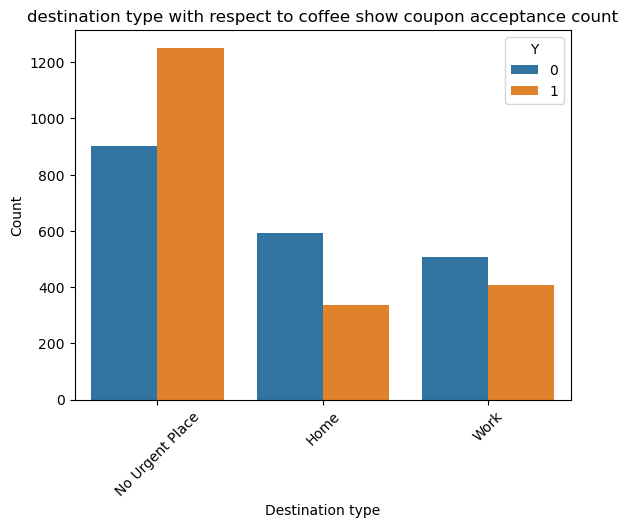

In [60]:
fig = sns.countplot(x="destination", data=coffee_data, hue="Y")
plt.xlabel("Destination type")
plt.ylabel("Count")
plt.title("destination type with respect to coffee show coupon acceptance count")
plt.xticks(rotation = 45)
plt.show(fig)

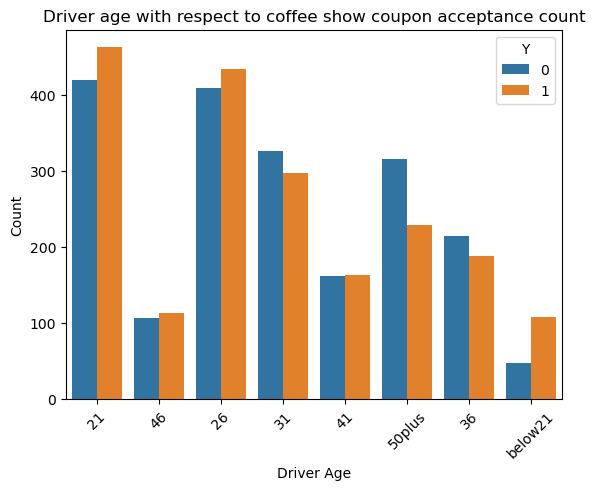

In [61]:
fig = sns.countplot(x="age", data=coffee_data, hue="Y")
plt.xlabel("Driver Age")
plt.ylabel("Count")
plt.title("Driver age with respect to coffee show coupon acceptance count")
plt.xticks(rotation = 45)
plt.show(fig)

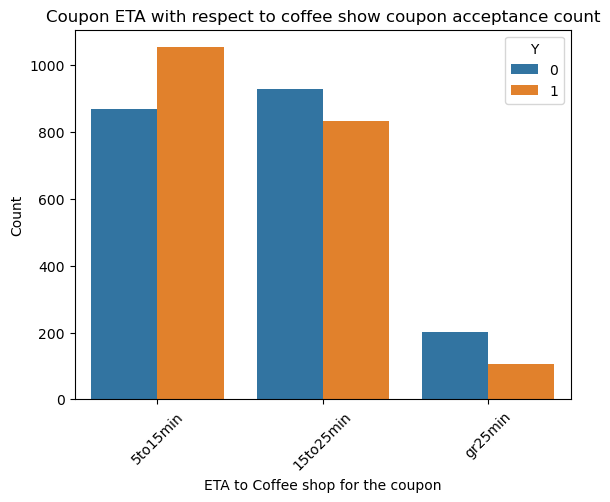

In [62]:
fig = sns.countplot(x="CouponETA", data=coffee_data, hue="Y")
plt.xlabel("ETA to Coffee shop for the coupon")
plt.ylabel("Count")
plt.title("Coupon ETA with respect to coffee show coupon acceptance count")
plt.xticks(rotation = 45)
plt.show(fig)

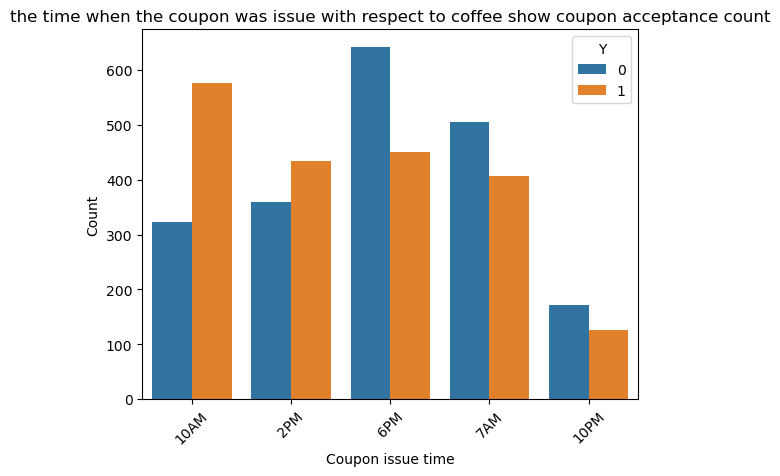

In [74]:
fig = sns.countplot(x="time", data=coffee_data, hue="Y")
plt.xlabel("Coupon issue time")
plt.ylabel("Count")
plt.title("the time when the coupon was issue with respect to coffee show coupon acceptance count")
plt.xticks(rotation = 45)
plt.show(fig)

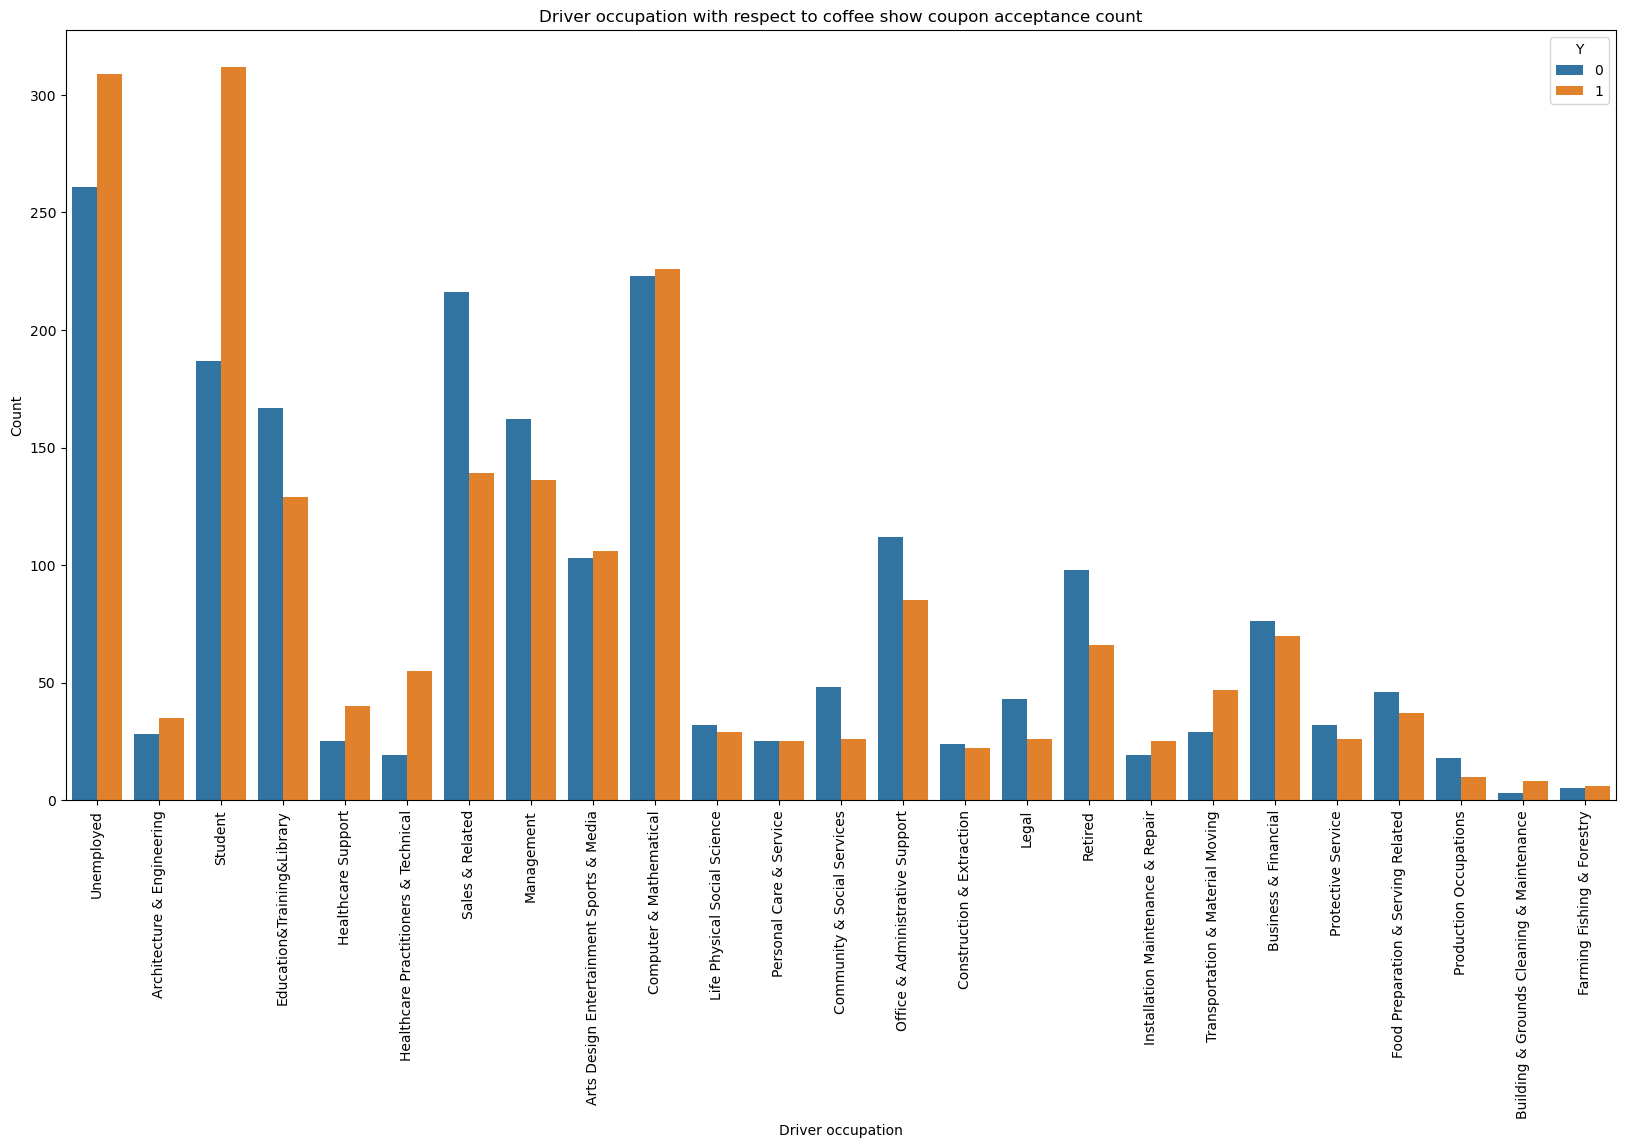

In [114]:
plt.figure(figsize=(20,10))
fig = sns.countplot(x="occupation", data=coffee_data, hue="Y")
plt.xlabel("Driver occupation",)
plt.ylabel("Count")
plt.title("Driver occupation with respect to coffee show coupon acceptance count")
plt.xticks(rotation = 90)
plt.show(fig)

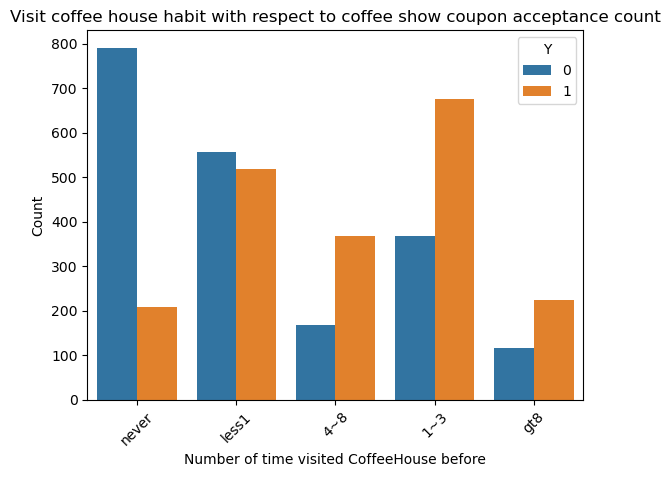

In [85]:
fig = sns.countplot(x="CoffeeHouse", data=coffee_data, hue="Y")
plt.xlabel("Number of time visited CoffeeHouse before",)
plt.ylabel("Count")
plt.title("Visit coffee house habit with respect to coffee show coupon acceptance count")
plt.xticks(rotation = 45)
plt.show(fig)

### From the above graphs, it looks like driver with age 21 or yonger not going to urgent places from 10 am to 2pm, and the coffee shop that issue the coupon is within 15 minutes away are more likely to accept the coupon. Lets do the following anaysis to confirm it.

In [120]:
coffee_shop_targeted_stat = coffee_data[(coffee_data['time'].isin(['10AM','2PM'])) &
                                        (coffee_data['CouponETA'] == "5to15min") &
                                        (coffee_data['age'].isin(['21','below21'])) &
                                        (coffee_data['destination']== 'No Urgent Place') & 
                                        (coffee_data['occupation']=='Student') &
                                        (coffee_data['CoffeeHouse'].isin(['1~3','4~8','gt8']))]['Y']

coffee_targeted_stat_yes = coffee_shop_targeted_stat.value_counts()[1]
coffee_targeted_stat_no = coffee_shop_targeted_stat.value_counts()[0]

coffee_target_acceptance_rate = coffee_targeted_stat_yes/(coffee_targeted_stat_yes+coffee_targeted_stat_no)
print(f'Coffee House coupon acceptance rate for the targered deriver is {coffee_target_acceptance_rate}')

Coffee House coupon acceptance rate for the targered deriver is 0.8909090909090909


## Coffee House coupon Conclusion
From the above analysis, we see the targed acceptance rate of the coffee house coupon is now up to 0.89. So i would recommend to target sending the coupon to students or yonger people who have habit of going to coffee house in the morning, preferably when they are not urgently going somewhere and it is within 15 minutes to the coffee house that issue the coupon.